In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
    %matplotlib inline
    warnings.filterwarnings('ignore')
    %precision 2

'%.2f'

In [66]:
df = pd.read_csv("911.csv")
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [3]:
df.shape

(99492, 9)

#### Renaming the colunm 

In [4]:
df1 = df.rename({'lat':'Latitude','lng':'Longitude','desc':'Description','zip':'Zip code','title':'Title','timestamp':'Time','twp':'Township','addr':'Address','e':'Variable'},axis=1)

In [5]:
df1.head(1)

,Latitude,Longitude,Description,Zip code,Title,timeStamp,Township,Address,Variable
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Latitude     99492 non-null  float64
 1   Longitude    99492 non-null  float64
 2   Description  99492 non-null  object 
 3   Zip code     86637 non-null  float64
 4   Title        99492 non-null  object 
 5   timeStamp    99492 non-null  object 
 6   Township     99449 non-null  object 
 7   Address      98973 non-null  object 
 8   Variable     99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [70]:
df1.describe().value_counts()

Latitude      Longitude      Zip code      Hour          Month       
0.094446       0.174826      345.344914    5.671564      3.012176        1
30.333596     -95.595595     17752.000000  0.000000      1.000000        1
40.100423     -75.392104     19038.000000  9.000000      3.000000        1
40.145223     -75.304667     19401.000000  14.000000     5.000000        1
40.159526     -75.317464     19237.658298  13.117085     4.983195        1
40.229008     -75.212513     19446.000000  17.000000     7.000000        1
41.167156     -74.995041     77316.000000  23.000000     12.000000       1
99492.000000   99492.000000  86637.000000  99492.000000  99492.000000    1
dtype: int64

In [7]:
df1.describe

<bound method NDFrame.describe of         Latitude  Longitude  \
0      40.297876 -75.581294   
1      40.258061 -75.264680   
2      40.121182 -75.351975   
3      40.116153 -75.343513   
4      40.251492 -75.603350   
...          ...        ...   
99487  40.132869 -75.333515   
99488  40.006974 -75.289080   
99489  40.115429 -75.334679   
99490  40.186431 -75.192555   
99491  40.207055 -75.317952   

                                             Description  Zip code  \
0      REINDEER CT & DEAD END;  NEW HANOVER; Station ...   19525.0   
1      BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   19446.0   
2      HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   19401.0   
3      AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   19401.0   
4      CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...       NaN   
...                                                  ...       ...   
99487  MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...   19401.0   
99488  LANCASTER AVE & RITTENHOUS

In [8]:
df1.isnull().head(99492).value_counts()


Latitude  Longitude  Description  Zip code  Title  timeStamp  Township  Address  Variable
False     False      False        False     False  False      False     False    False       86576
                                  True      False  False      False     False    False       12366
                                                                        True     False         460
                                  False     False  False      False     True     False          47
                                  True      False  False      True      False    False          17
                                  False     False  False      True      False    False          14
                                  True      False  False      True      True     False          12
dtype: int64

<AxesSubplot:>

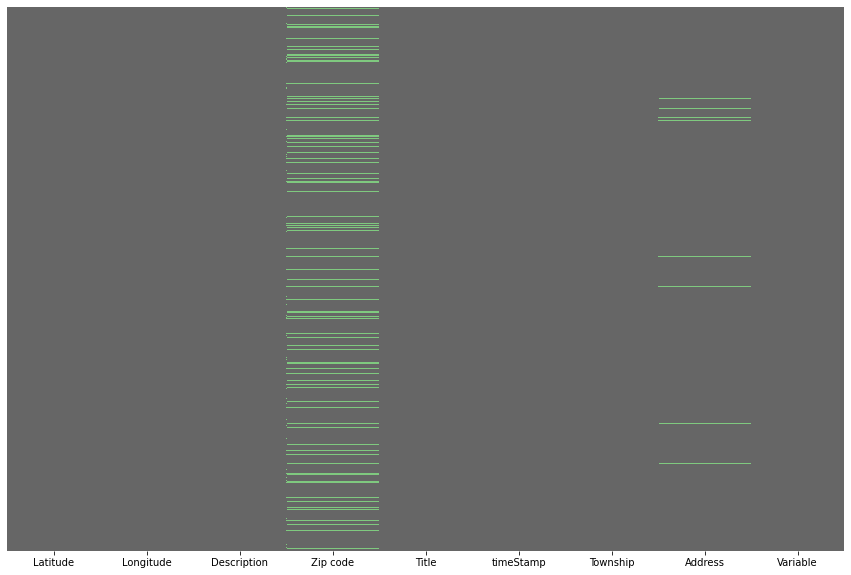

In [9]:
figure = plt.figure(figsize=(15,10))
sns.heatmap(df1.isnull(),yticklabels=False,cbar=False,cmap='Accent_r')

In [10]:
df1.count()

Latitude       99492
Longitude      99492
Description    99492
Zip code       86637
Title          99492
timeStamp      99492
Township       99449
Address        98973
Variable       99492
dtype: int64

In [11]:
df1['timeStamp'].isnull().value_counts()

False    99492
Name: timeStamp, dtype: int64

In [12]:
df1['Title'].isnull().head(99492).value_counts()

False    99492
Name: Title, dtype: int64

#### Finding the nan values and its location from the csv and make changes 
 
1. Zip code     
2. Township        
3. Address

In [13]:
df1[df1['Zip code'].isnull()].head()

,Latitude,Longitude,Description,Zip code,Title,timeStamp,Township,Address,Variable
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1
10,40.231990,-75.251891,RT202 PKWY & KNAPP RD; MONTGOMERY; 2015-12-10 ...,NaN,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:40:01,MONTGOMERY,RT202 PKWY & KNAPP RD,1
14,40.097222,-75.376195,SCHUYLKILL EXPY & CROTON RD UNDERPASS; UPPER M...,NaN,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:40:02,UPPER MERION,SCHUYLKILL EXPY & CROTON RD UNDERPASS,1
23,40.143326,-75.422819,RT422 & PAWLINGS RD OVERPASS; LOWER PROVIDENC...,NaN,Traffic: DISABLED VEHICLE -,2015-12-10 18:02:02,LOWER PROVIDENCE,RT422 & PAWLINGS RD OVERPASS,1
24,40.153268,-75.189558,SUMMIT AVE & RT309 UNDERPASS; UPPER DUBLIN; 20...,NaN,Traffic: VEHICLE ACCIDENT -,2015-12-10 18:02:02,UPPER DUBLIN,SUMMIT AVE & RT309 UNDERPASS,1


In [14]:
df1[df1['Address'].isnull()].head()

,Latitude,Longitude,Description,Zip code,Title,timeStamp,Township,Address,Variable
33,40.297876,-75.581294,; NEW HANOVER; 2015-12-10 @ 18:20:28;,19525.0,Traffic: DISABLED VEHICLE -,2015-12-10 18:22:01,NEW HANOVER,NaN,1
34,40.081260,-75.137025,; CHELTENHAM; 2015-12-10 @ 18:20:28;,NaN,Traffic: DISABLED VEHICLE -,2015-12-10 18:26:02,CHELTENHAM,NaN,1
121,40.097222,-75.376195,; UPPER MERION; 2015-12-11 @ 01:15:42;,NaN,Traffic: DISABLED VEHICLE -,2015-12-11 01:17:02,UPPER MERION,NaN,1
323,40.256213,-75.463788,; SCHWENKSVILLE; 2015-12-11 @ 15:30:40;,19473.0,Traffic: DISABLED VEHICLE -,2015-12-11 15:32:02,SCHWENKSVILLE,NaN,1
325,40.222882,-75.398789,; SKIPPACK; 2015-12-11 @ 15:30:40;,NaN,Traffic: DISABLED VEHICLE -,2015-12-11 15:36:01,SKIPPACK,NaN,1


In [15]:
df1['Address'].isnull ().value_counts()

False    98973
True       519
Name: Address, dtype: int64

In [16]:
df1[df1['Zip code'].isnull()].head(10)

,Latitude,Longitude,Description,Zip code,Title,timeStamp,Township,Address,Variable
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1
10,40.231990,-75.251891,RT202 PKWY & KNAPP RD; MONTGOMERY; 2015-12-10 ...,NaN,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:40:01,MONTGOMERY,RT202 PKWY & KNAPP RD,1
14,40.097222,-75.376195,SCHUYLKILL EXPY & CROTON RD UNDERPASS; UPPER M...,NaN,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:40:02,UPPER MERION,SCHUYLKILL EXPY & CROTON RD UNDERPASS,1
23,40.143326,-75.422819,RT422 & PAWLINGS RD OVERPASS; LOWER PROVIDENC...,NaN,Traffic: DISABLED VEHICLE -,2015-12-10 18:02:02,LOWER PROVIDENCE,RT422 & PAWLINGS RD OVERPASS,1
24,40.153268,-75.189558,SUMMIT AVE & RT309 UNDERPASS; UPPER DUBLIN; 20...,NaN,Traffic: VEHICLE ACCIDENT -,2015-12-10 18:02:02,UPPER DUBLIN,SUMMIT AVE & RT309 UNDERPASS,1
28,40.097222,-75.376195,SCHUYLKILL EXPY & WEADLEY RD OVERPASS; UPPER M...,NaN,Traffic: VEHICLE ACCIDENT -,2015-12-10 18:06:26,UPPER MERION,SCHUYLKILL EXPY & WEADLEY RD OVERPASS,1
30,40.097222,-75.376195,SCHUYLKILL EXPY & WEADLEY RD OVERPASS; UPPER M...,NaN,Traffic: VEHICLE ACCIDENT -,2015-12-10 18:11:01,UPPER MERION,SCHUYLKILL EXPY & WEADLEY RD OVERPASS,1
34,40.081260,-75.137025,; CHELTENHAM; 2015-12-10 @ 18:20:28;,NaN,Traffic: DISABLED VEHICLE -,2015-12-10 18:26:02,CHELTENHAM,NaN,1
36,40.221227,-75.288737,MORRIS RD & MUHLENBURG DR; UPPER GWYNEDD; 2015...,NaN,Traffic: DISABLED VEHICLE -,2015-12-10 18:27:01,UPPER GWYNEDD,MORRIS RD & MUHLENBURG DR,1
39,40.066718,-75.307176,CONSHOHOCKEN STATE RD; WEST CONSHOHOCKEN; Sta...,NaN,EMS: VEHICLE ACCIDENT,2015-12-10 18:32:02,WEST CONSHOHOCKEN,CONSHOHOCKEN STATE RD,1


#### There fore there is no require to keep description and variable as incomplete data is also missing in csv

In [17]:
df1.head(1)

,Latitude,Longitude,Description,Zip code,Title,timeStamp,Township,Address,Variable
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1


In [18]:
df1.drop('Description',inplace=True, axis=1)

In [19]:
df1.drop('Variable',inplace=True, axis =1)

In [20]:
df1.head()

,Latitude,Longitude,Zip code,Title,timeStamp,Township,Address
0,40.297876,-75.581294,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END
1,40.258061,-75.264680,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN
2,40.121182,-75.351975,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE
3,40.116153,-75.343513,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST
4,40.251492,-75.603350,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END


In [21]:
df1.shape

(99492, 7)

In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Latitude   99492 non-null  float64
 1   Longitude  99492 non-null  float64
 2   Zip code   86637 non-null  float64
 3   Title      99492 non-null  object 
 4   timeStamp  99492 non-null  object 
 5   Township   99449 non-null  object 
 6   Address    98973 non-null  object 
dtypes: float64(3), object(4)
memory usage: 5.3+ MB


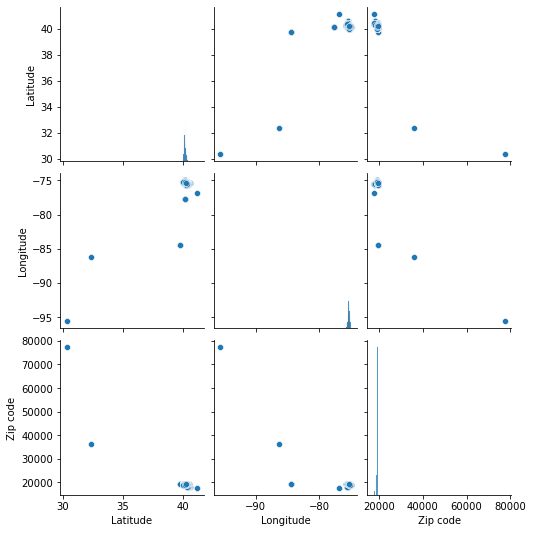

In [23]:
sns.pairplot(data=df1)   

In [24]:
d4 = [var for var in df1.columns if df1[var].dtype=='O'] 
d4

['Title', 'timeStamp', 'Township', 'Address']

## Questions 

#### From which zipcode got more calls on 911  ?

In [25]:
df1['Zip code'].value_counts().iloc[:5]

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: Zip code, dtype: int64

#### Find the null value present in the zip of csv and find the ratio of data missing in the data? 

In [26]:
df1['Zip code'].value_counts().isnull().iloc[:99492].count()


104

<AxesSubplot:xlabel='count', ylabel='Zip code'>

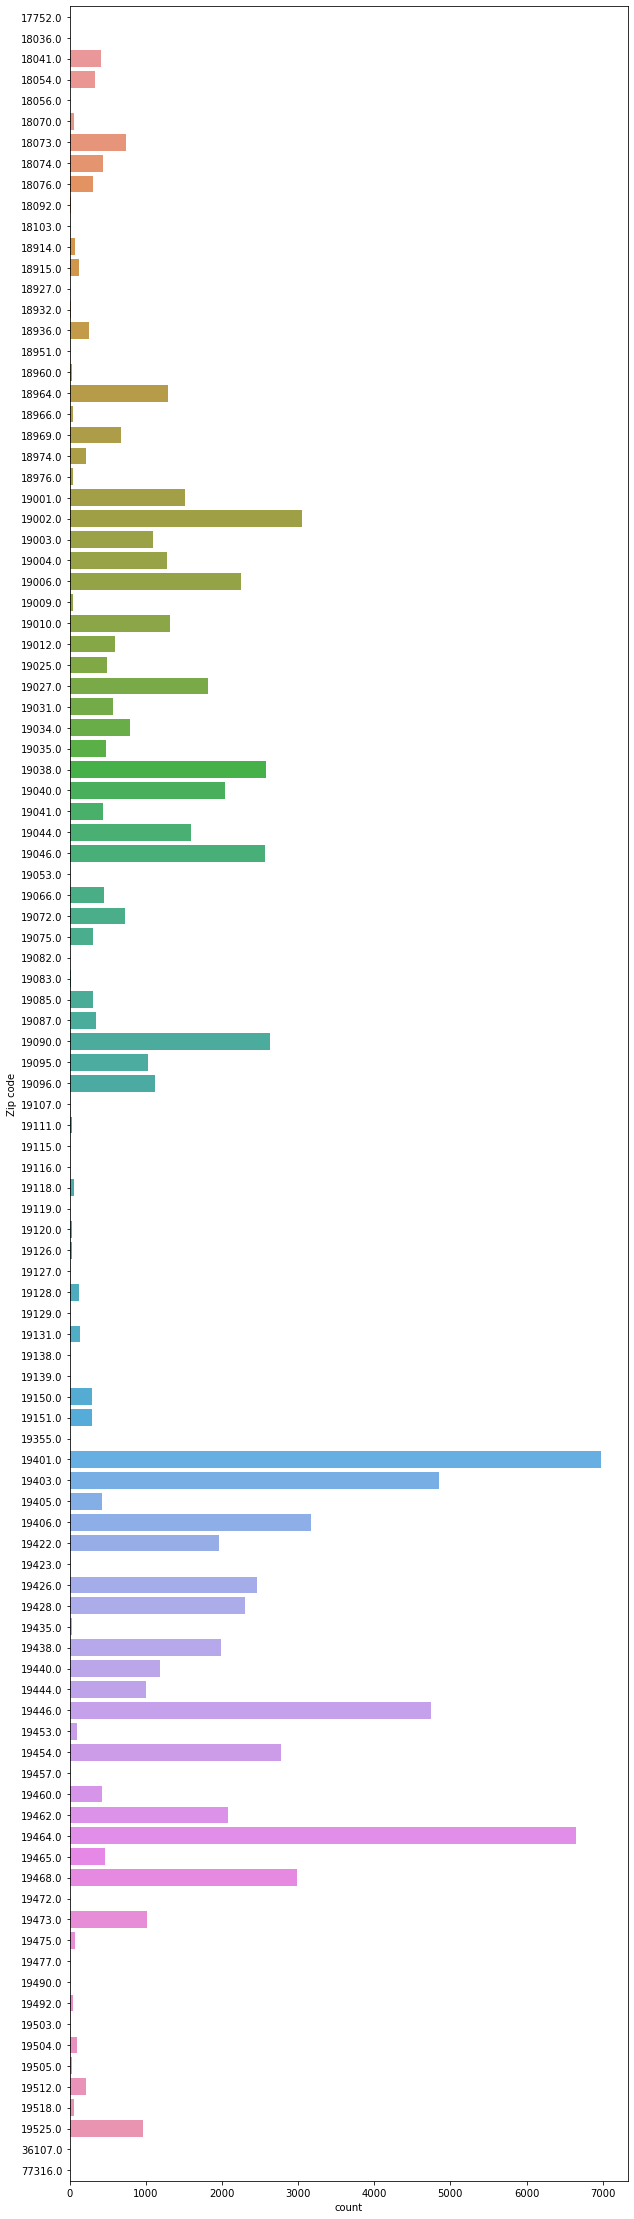

In [27]:
plt.figure(figsize = (10, 40)) 
sns.countplot(y='Zip code',data=df1) 

In [28]:
a = pd.DataFrame(df1['Zip code'].notnull().value_counts())
a

,Zip code
True,86637
False,12855


<AxesSubplot:xlabel='Zip code', ylabel='count'>

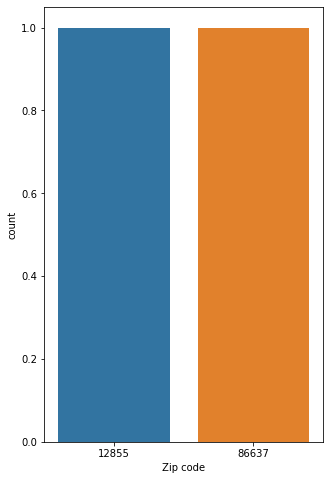

In [29]:
plt.figure(figsize = (5, 8)) 
sns.countplot(x='Zip code',data=a) 

#### From which longiude and latitude got more calls on 911 ?

In [30]:
df1['Longitude'].value_counts().iloc[:99492].head(10)



-75.376195    1491
-75.282905    1031
-75.387852    1006
-75.408463     938
-75.236238     711
-75.492728     524
-75.306233     490
-75.189558     467
-75.316295     431
-75.137025     406
Name: Longitude, dtype: int64

In [31]:
df1['Latitude'].value_counts().iloc[:99492].head(10)


40.097222    1491
40.229008    1006
40.133037     938
40.024967     905
40.172314     521
40.108267     490
40.153268     467
40.069832     431
40.081260     406
40.289027     400
Name: Latitude, dtype: int64

#### Which are the township from where a max. time call attended and find the total number of township in data and find that is the data null or not?

In [32]:
a1 = df1['Township'].value_counts().iloc[:99492]
a1

LOWER MERION     8443
ABINGTON         5977
NORRISTOWN       5890
UPPER MERION     5227
CHELTENHAM       4575
                 ... 
BRYN ATHYN        173
SALFORD           163
GREEN LANE         51
PHILA COUNTY       43
LEHIGH COUNTY      30
Name: Township, Length: 68, dtype: int64

In [33]:
d2 = pd.DataFrame(df1['Township'])
d2

,Township
0,NEW HANOVER
1,HATFIELD TOWNSHIP
2,NORRISTOWN
3,NORRISTOWN
4,LOWER POTTSGROVE
...,...
99487,NORRISTOWN
99488,LOWER MERION
99489,NORRISTOWN
99490,HORSHAM


In [34]:
df1['Township'].keys()

RangeIndex(start=0, stop=99492, step=1)

In [35]:
df1['Township'].unique()

array(['NEW HANOVER', 'HATFIELD TOWNSHIP', 'NORRISTOWN',
       'LOWER POTTSGROVE', 'LANSDALE', 'HORSHAM', 'SKIPPACK',
       'LOWER SALFORD', 'PLYMOUTH', 'MONTGOMERY', 'UPPER MORELAND',
       'CHELTENHAM', 'UPPER MERION', 'WHITEMARSH', 'UPPER GWYNEDD',
       'LOWER PROVIDENCE', 'UPPER DUBLIN', 'WHITPAIN', 'DELAWARE COUNTY',
       'FRANCONIA', 'WEST CONSHOHOCKEN', 'LOWER MERION', 'LIMERICK',
       'TOWAMENCIN', 'DOUGLASS', 'POTTSTOWN', 'BRIDGEPORT', 'AMBLER',
       'CHESTER COUNTY', 'UPPER HANOVER', 'SPRINGFIELD', 'ROCKLEDGE',
       'ABINGTON', 'WEST NORRITON', 'ROYERSFORD', 'UPPER SALFORD',
       'LOWER MORELAND', 'CONSHOHOCKEN', 'PENNSBURG', 'TELFORD',
       'EAST NORRITON', 'UPPER FREDERICK', 'UPPER PROVIDENCE', 'SALFORD',
       'HATFIELD BORO', 'LEHIGH COUNTY', 'LOWER GWYNEDD', 'MARLBOROUGH',
       'BRYN ATHYN', 'HATBORO', 'WORCESTER', 'COLLEGEVILLE',
       'SCHWENKSVILLE', 'PERKIOMEN', 'SOUDERTON', 'UPPER POTTSGROVE',
       'LOWER FREDERICK', nan, 'BUCKS COUNTY', 'RED 

In [36]:
a.count()

Zip code    2
dtype: int64

In [37]:
df1['Township'].isnull().value_counts()

False    99449
True        43
Name: Township, dtype: int64

#### Find address from which location a huge calls are attended? 

In [38]:
df1['Address'].value_counts().iloc[:10]

SHANNONDELL DR & SHANNONDELL BLVD        938
MAIN ST & OLD SUMNEYTOWN PIKE            390
THE FAIRWAY  & RYDAL RD                  260
GULPH RD & KIRK AVE                      235
EVERGREEN RD & W LIGHTCAP RD             232
BLACK ROCK RD & S TRAPPE RD              219
GERMANTOWN PIKE & HANNAH AVE             210
EAGLEVILLE RD & SUNDERLAND DR            209
DAVISVILLE RD & PENNYPACK RD             203
SCHUYLKILL EXPY & WEADLEY RD OVERPASS    199
Name: Address, dtype: int64

In [39]:
df1['Address'].count()

98973

In [40]:
df['addr'].isnull().value_counts()

False    98973
True       519
Name: addr, dtype: int64

In [41]:
df1['Title'].unique()

array(['EMS: BACK PAINS/INJURY', 'EMS: DIABETIC EMERGENCY',
       'Fire: GAS-ODOR/LEAK', 'EMS: CARDIAC EMERGENCY', 'EMS: DIZZINESS',
       'EMS: HEAD INJURY', 'EMS: NAUSEA/VOMITING',
       'EMS: RESPIRATORY EMERGENCY', 'EMS: SYNCOPAL EPISODE',
       'Traffic: VEHICLE ACCIDENT -', 'EMS: VEHICLE ACCIDENT',
       'Traffic: DISABLED VEHICLE -', 'Fire: APPLIANCE FIRE',
       'EMS: GENERAL WEAKNESS', 'Fire: CARBON MONOXIDE DETECTOR',
       'EMS: UNKNOWN MEDICAL EMERGENCY', 'EMS: UNRESPONSIVE SUBJECT',
       'Fire: VEHICLE ACCIDENT', 'EMS: ALTERED MENTAL STATUS',
       'Fire: FIRE ALARM', 'EMS: CVA/STROKE',
       'Traffic: ROAD OBSTRUCTION -', 'EMS: SUBJECT IN PAIN',
       'EMS: HEMORRHAGING', 'EMS: FALL VICTIM', 'EMS: ASSAULT VICTIM',
       'EMS: SEIZURES', 'EMS: MEDICAL ALERT ALARM',
       'EMS: ABDOMINAL PAINS', 'Fire: PUMP DETAIL',
       'Fire: FIRE INVESTIGATION', 'EMS: OVERDOSE', 'EMS: MATERNITY',
       'EMS: UNCONSCIOUS SUBJECT', 'EMS: CHOKING', 'EMS: LACERATIONS',
     

In [42]:
a5 = pd.DataFrame(df1['Title'].str.split(expand=True)).head()
a5

,0,1,2,3,4
0,EMS:,BACK,PAINS/INJURY,None,None
1,EMS:,DIABETIC,EMERGENCY,None,None
2,Fire:,GAS-ODOR/LEAK,None,None,None
3,EMS:,CARDIAC,EMERGENCY,None,None
4,EMS:,DIZZINESS,None,None,None


#### What type of accident happends and total of them?

In [43]:
df1['Accident']=df['title'].apply(lambda x:x.split (':')[0])
df1.head()

,Latitude,Longitude,Zip code,Title,timeStamp,Township,Address,Accident
0,40.297876,-75.581294,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,EMS
1,40.258061,-75.264680,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,EMS
2,40.121182,-75.351975,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,Fire
3,40.116153,-75.343513,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,EMS
4,40.251492,-75.603350,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,EMS


In [44]:
df1['Accident'].unique()

array(['EMS', 'Fire', 'Traffic'], dtype=object)

In [45]:
df1['Accident'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Accident, dtype: int64

<AxesSubplot:xlabel='Accident', ylabel='count'>

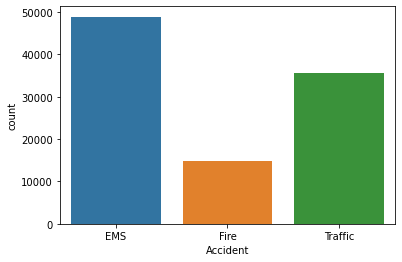

In [46]:
sns.countplot(x='Accident',data=df1)     # Ems = Emergency Medical Service requires more attention 

####  What is the dtype of timeStamp and convert it into perfect formate and add new column for month and day?

In [47]:
type(df1['timeStamp'].iloc[0])

str

In [1]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])
df['timeStamp'].describe


NameError: name 'pd' is not defined

In [49]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   lat        99492 non-null  float64       
 1   lng        99492 non-null  float64       
 2   desc       99492 non-null  object        
 3   zip        86637 non-null  float64       
 4   title      99492 non-null  object        
 5   timeStamp  99492 non-null  datetime64[ns]
 6   twp        99449 non-null  object        
 7   addr       98973 non-null  object        
 8   e          99492 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 6.8+ MB


In [50]:
df['timeStamp'].value_counts().head()

2015-12-10 17:40:01    8
2015-12-23 14:12:01    7
2016-04-21 17:57:01    7
2016-04-03 09:52:02    6
2016-02-24 23:32:02    6
Name: timeStamp, dtype: int64

In [51]:
df1['Hour'] = df['timeStamp'].apply(lambda time:time.hour)
df1['Month'] = df['timeStamp'].apply(lambda time:time.month)
df1['Day of Week'] = df['timeStamp'].apply(lambda time:time.dayofweek)

In [52]:
df1.head(2)

,Latitude,Longitude,Zip code,Title,timeStamp,Township,Address,Accident,Hour,Month,Day of Week
0,40.297876,-75.581294,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,EMS,17,12,3
1,40.258061,-75.264680,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,EMS,17,12,3


In [53]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df1['Day of Week'] = df1['Day of Week'].apply(lambda int:dmap[int])

In [54]:
df1.head()

,Latitude,Longitude,Zip code,Title,timeStamp,Township,Address,Accident,Hour,Month,Day of Week
0,40.297876,-75.581294,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,EMS,17,12,Thu
1,40.258061,-75.264680,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,EMS,17,12,Thu
2,40.121182,-75.351975,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,Fire,17,12,Thu
3,40.116153,-75.343513,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,EMS,17,12,Thu
4,40.251492,-75.603350,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,EMS,17,12,Thu


In [55]:
df1['Day of Week'].value_counts()

Tue    15150
Wed    14879
Fri    14833
Mon    14680
Thu    14478
Sat    13336
Sun    12136
Name: Day of Week, dtype: int64

<AxesSubplot:xlabel='Day of Week', ylabel='count'>

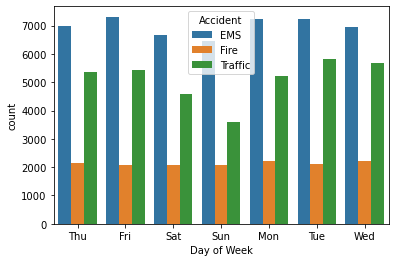

In [56]:
sns.countplot(x='Day of Week',hue='Accident',data=df1)

In [57]:
Month = df1.groupby(by='Month').count()
Month

,Latitude,Longitude,Zip code,Title,timeStamp,Township,Address,Accident,Hour,Day of Week
Month,,,,,,,,,,
1,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205
2,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467
3,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101
4,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326
5,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423
6,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786
7,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137
8,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078
12,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969


In [58]:
hour = df1.groupby(by='Hour').count()
hour

,Latitude,Longitude,Zip code,Title,timeStamp,Township,Address,Accident,Month,Day of Week
Hour,,,,,,,,,,
0,2112,2112,1869,2112,2112,2109,2105,2112,2112,2112
1,1721,1721,1530,1721,1721,1718,1714,1721,1721,1721
2,1549,1549,1350,1549,1549,1548,1543,1549,1549,1549
3,1435,1435,1264,1435,1435,1433,1431,1435,1435,1435
4,1418,1418,1254,1418,1418,1418,1415,1418,1418,1418
5,1629,1629,1401,1629,1629,1628,1628,1629,1629,1629
6,2513,2513,2112,2513,2513,2511,2504,2513,2513,2513
7,3970,3970,3418,3970,3970,3969,3947,3970,3970,3970
8,5044,5044,4385,5044,5044,5044,5023,5044,5044,5044


<AxesSubplot:xlabel='Month'>

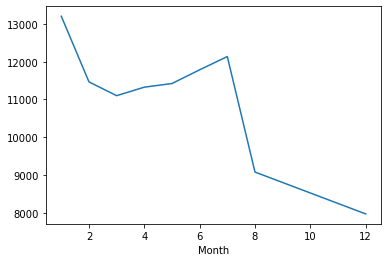

In [59]:
Month['Latitude'].plot()

In [60]:
df['Date'] = df['timeStamp'].apply(lambda time:time.date())

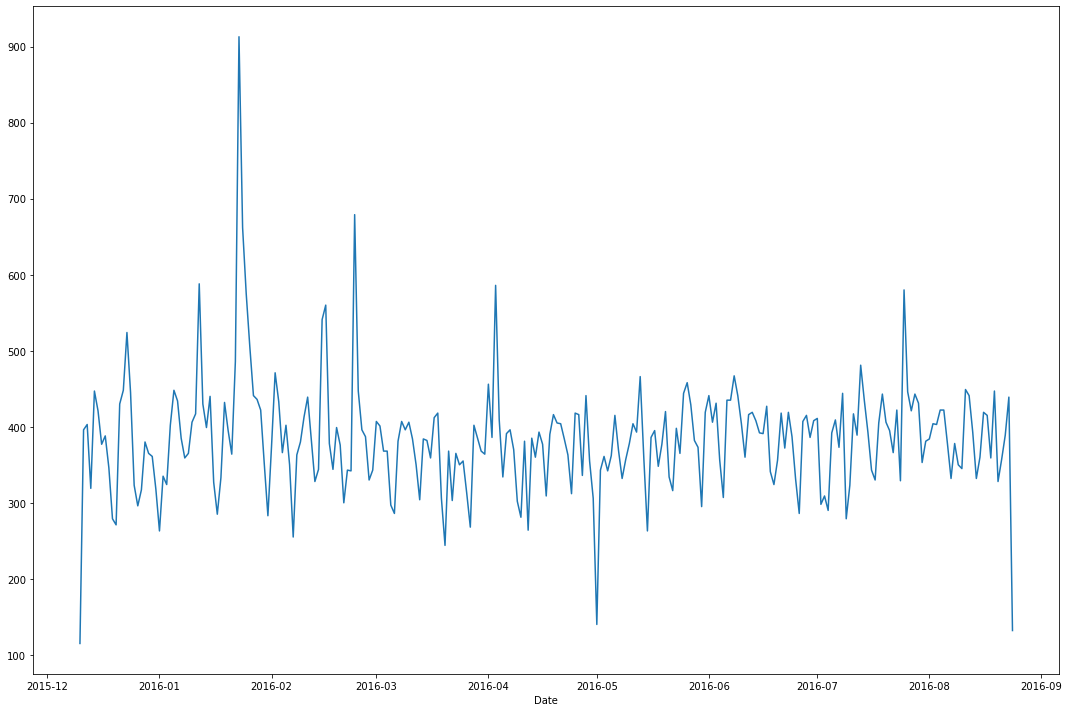

In [61]:
figure = plt.figure(figsize=(15,10))
df.groupby(by='Date').count()['lat'].plot()
plt.tight_layout()

In [62]:
dayofweek = df1.groupby(by=['Day of Week','Hour']).count()['Latitude'].unstack()
dayofweek = dayofweek.loc[['Sun','Mon','Tue','Wed','Thu','Fri','Sat']]
dayofweek

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467


<AxesSubplot:xlabel='Hour', ylabel='Day of Week'>

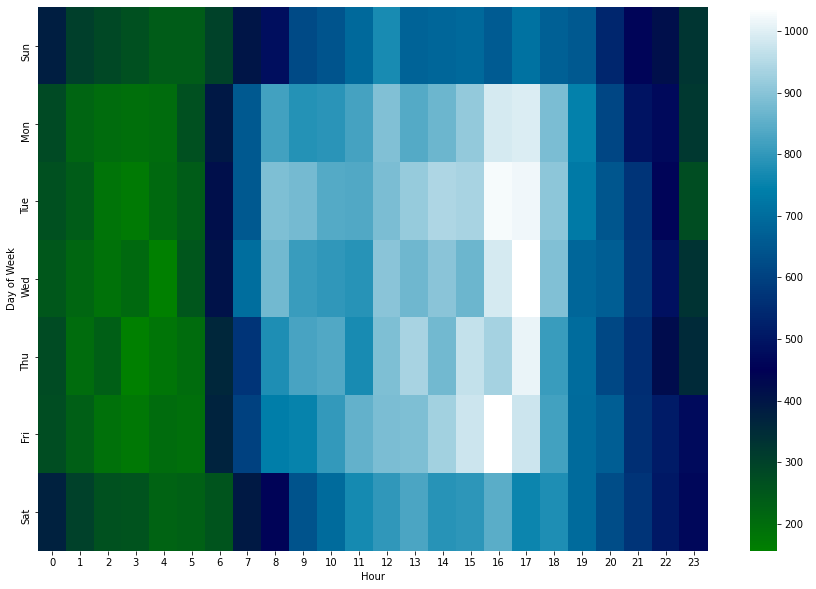

In [63]:
figure = plt.figure(figsize=(15,10))
sns.heatmap(dayofweek, cmap='ocean')

In [64]:
month_ = df1.groupby(['Day of Week','Month']).count()['Latitude'].unstack()
month_ = month_.loc[['Sun','Mon','Tue','Wed','Thu','Fri','Sat']]
month_

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Tue,1973,1753,1884,1430,1918,1676,1670,1612,1234
Wed,1700,1903,1889,1517,1538,2058,1717,1295,1262
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978


<function matplotlib.pyplot.pie(x, explode=None, labels=None, colors=None, autopct=None, pctdistance=0.6, shadow=False, labeldistance=1.1, startangle=0, radius=1, counterclock=True, wedgeprops=None, textprops=None, center=(0, 0), frame=False, rotatelabels=False, *, normalize=None, data=None)>

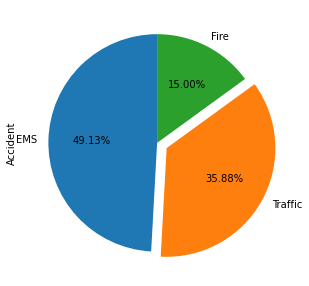

In [65]:
df1['Accident'].value_counts().plot(kind='pie',startangle=90,figsize=(20,5),explode=(0,0.1,0),autopct='%0.2f%%')
plt.pie

In [ ]:
plt.figure(figsize = (20 , 10))
sns.set_style('whitegrid')
sns.countplot(x='Latitude',hue='Accident',data=df1,palette='rainbow')